In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import sympy as sp

# !curl https://raw.githubusercontent.com/websitenotavailable/learning/master/L-3_Math/learnmath.py -o learnmath.py
from learnmath import *

import pandas as pd
from datetime import datetime as dt

import statsmodels.formula.api as smf
from scipy import stats

## Generate Sample Data

Let's generate a dataset with a simple linear relationship (with some noise).

In [2]:
X = np.linspace(0, 10, 500)


m = 2 # slope
b = 3 # intercept

# add noise term (randomness in data)
noise = np.random.normal(0, 3, X.shape) # mean, var, number of points

Y = m*X + b + noise

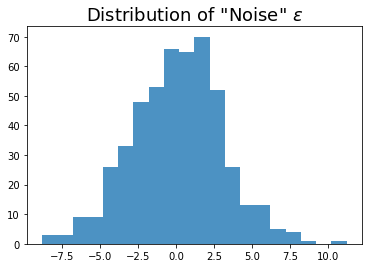

In [3]:
# distribution of our errors (should be normal)
plt.hist(noise, bins=20, alpha=0.8)

plt.title('Distribution of "Noise" $\epsilon$', fontsize=18)

plt.show()

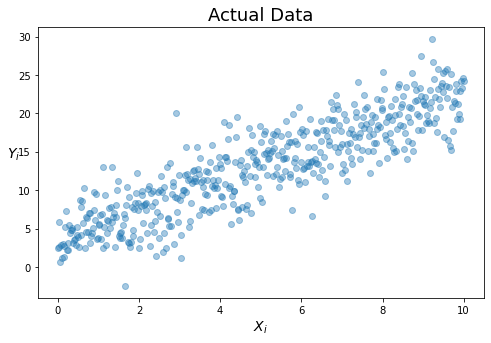

In [4]:
# look at our data


plt.figure(figsize=(8, 5))
plt.scatter(X, Y, alpha=0.4)

plt.title('Actual Data', fontsize=18)

label_kwargs = dict(fontsize=14, rotation=0)
plt.ylabel('$Y_i$', **label_kwargs)
plt.xlabel('$X_i$', **label_kwargs)

plt.show()

# Single-Variable Linear Regression Model

We know that the data follows a linear relationship. So let's use a simple **`linear regression model`**.
$$
\begin{align}
    \hat{Y_i} = \beta_1 x_i + \beta_0
\end{align}
$$
**Parameters**
* $\hat{Y_i}$ is predicted value.
* $x_i$ is input value.
* $\beta_1$ is the model's coefficient (trying to estimate $m$).
* $\beta_0$ is the bias (trying to estimate $b$).

## Cost Function

We need a way to improve our estimated parameters: a cost function that tells us how far off our prediction is from the actual data. The standard cost function for linear regressions is the `least squared error`.


Sum of squared error:
$$
\begin{align}
    \text{SSE} &= \sum_{i=1}^{n}(y_i - \hat{y_i})^2
    \\
    &=\sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0)^2
\end{align}
$$

We minimize SE by taking partial derivatives with respect to our free parameters setting derivatives to $0$.

In [5]:
y = sp.IndexedBase('y')
y_hat = sp.IndexedBase('\hat{y}')
x = sp.IndexedBase('x')

β_1, β_0 = sp.symbols(r'\beta_1, \beta_0')
i, n = sp.symbols('i, n')

y_hat_i = β_1 * x[i] + β_0
Lx(r'\hat{y}_i', y_hat_i).show(end='')

SSE = sp.Sum((y[i] - y_hat_i)**2, (i, 0, n))
Lx(r'\text{SSE}', SSE).show(end='')

FOC = sp.Eq(SSE.diff(β_0), 0)

Lx(r'\text{FOC}', FOC, sep=':').show(end='')

---

### Parameter Estimation

Minimize cost function with respect to bias term $\beta_0$

$$
\begin{align}
    \frac{\partial \text{SSE}}{\partial \beta_0}
    &= \frac{\partial}{\partial \beta_0} \sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0)^2 \\
    0 &= -2\sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0) \\
    &= \sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0) \\
    &= \sum_{i=1}^{n}(y_i) - \beta_1 \sum_{i=1}^{n}(x_i) - \sum_{i=1}^{n}(\beta_0) \\
    &= \sum_{i=1}^{n}(y_i) - \beta_1 \sum_{i=1}^{n}(x_i) - n \beta_0 \\
    n \beta_0 & = \sum_{i=1}^{n}(y_i) - \beta_1 \sum_{i=1}^{n}(x_i) \\
    \\
    \beta_0 & = \frac{\sum_{i=1}^{n}(y_i)}{n} - \beta_1 \frac{\sum_{i=1}^{n}(x_i)}{n} \\
    \beta_0 &= \boxed{\bar{y} - \beta_1\bar{x}}
\end{align}
$$

Where:
* $\bar{y}$ is the average of our actual data values.
* $\bar{x}$ os the average of our input values.

---

Then minimize cost function with respect to coefficient $\beta_1$

$$
\begin{align}
    \frac{\partial \text{SSE}}{\partial \beta_1}
    &= \frac{\partial}{\partial \beta_1} \sum_{i=1}^{n}(y_i - \beta_1 x_i - \beta_0)^2 \\
    0 &= \sum_{i=1}^{n} -2x_i (y_i - \beta_1 x_i - \beta_0) \\
    &= \sum_{i=1}^{n} x_i(y_i - \beta_1 x_i - \beta_0) \\
    &= \sum_{i=1}^{n} (y_ix_i - \beta_1 x_i^2 - \beta_0x_i) \\
    &= \sum_{i=1}^{n} (y_ix_i - \beta_1 x_i^2 - (\bar{y} - \beta_1\bar{x})x_i) \\
    &= \sum_{i=1}^{n} (y_ix_i - \bar{y}x_i - \beta_1 x_i^2 + \beta_1\bar{x}x_i ) \\
    &= \sum_{i=1}^{n} (y_ix_i - \bar{y}x_i) + \sum_{i=1}^{n}(-\beta_1 x_i^2 + \beta_1\bar{x}x_i) \\
    &= \sum_{i=1}^{n} (y_ix_i - \bar{y}x_i) - \beta_1\sum_{i=1}^{n}(x_i^2 - \bar{x}x_i) \\
    \\
    \beta_1 &= \frac{\sum_{i=1}^{n} x_i(y_i - \bar{y}) - 0}{\sum_{i=1}^{n}x_i(x_i - \bar{x}) - 0}
    \\
    &= \frac{\sum_{i=1}^{n} x_i(y_i - \bar{y}) - \sum_{i=1}^{n} \bar{x}(y_i - \bar{y})}{\sum_{i=1}^{n}x_i(x_i - \bar{x}) - \sum_{i=1}^{n} \bar{x}(x_i - \bar{x})} \tag{*} \\
    &= \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})(x_i - \bar{x})} \\
    \beta_1 &= \boxed{ \frac{cov(x, y)}{\sigma_x^2}
    = \frac{\rho_{x, y}\sigma_y}{\sigma_x}}
    \\
\end{align}
$$


---

#### Footnote

Zero term derivation:

$$
\tag{*}  \sum_{i=1}^{n} \bar{x}(y_i - \bar{y}) = \bar{x} \left(\sum_{i=1}^{n} y_i - \sum_{i=1}^{n} \bar{y}\right) = \bar{x} (n\bar{y} - n\bar{y}) = 0
$$

#### Reference
Derivation from [Medium article](https://towardsdatascience.com/linear-regression-derivation-d362ea3884c2) by Ridley Leisy.

In [6]:
def mean(x):
    '''
    Returns mean of series x.
    
    Arguments
        x : Array of numbers
    '''
    
    return sum(x) / len(x)


def cov(x, y):
    '''
    Returns covariance between arrays x and y.
    
    Arguments
        x : Array of numbers
        y : Array of numbers
    '''
     
    x, y = np.array(x), np.array(y)
    
    return (x - mean(x))@(y - mean(y)) / len(x)


def var(x):
    '''
    Returns variance of y.
    
    Arguments
        y : Array of numbers
    '''
    
    return sum((np.array(x) - mean(x))**2) / len(x)

In [7]:
β_1 = cov(X, Y) / var(X)
β_0 = mean(Y) - β_1*mean(X)

print(f'y_hat = {β_1:.6f}x + {β_0:.6f}')

y_hat = 1.903711x + 3.566372


In [8]:
# getting beta using correlation
ρ = cov(X, Y) / np.sqrt(var(X) * var(Y))

ρ * np.sqrt(var(Y)) / np.sqrt(var(X))

1.9037110080919244

In [9]:
# predict
Y_hat = β_1*X + β_0

Y_actual = m*X + b

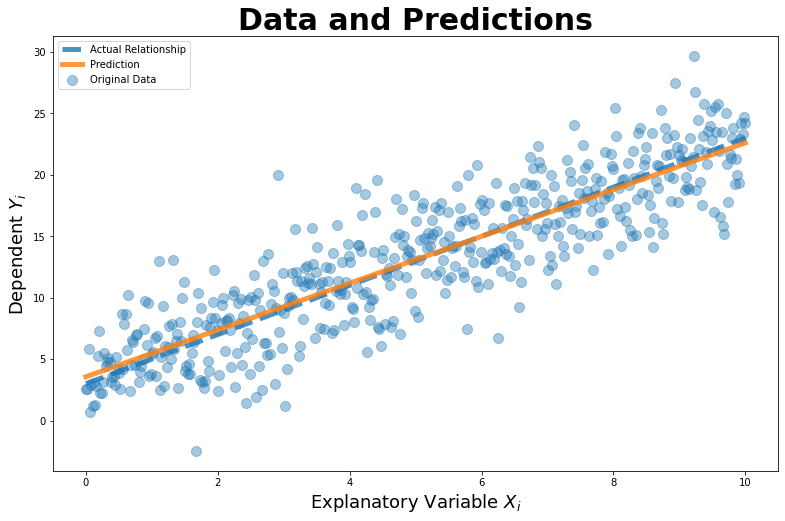

In [10]:
# plot our prediction with data

plt.figure(figsize=(13, 8))

plt.scatter(X, Y, alpha=0.4, s=100, label='Original Data') # OG data

plt.plot(X, Y_actual, lw=5, alpha=0.8, ls='--', label='Actual Relationship') # actual relationship

plt.plot(X, Y_hat, lw=5, alpha=0.8, label='Prediction') # prediction

plt.title('Data and Predictions', fontsize=30, fontweight='bold')

label_kwargs = dict(fontsize=18)
plt.ylabel('Dependent $Y_i$', **label_kwargs)
plt.xlabel('Explanatory Variable $X_i$', **label_kwargs)
plt.legend()

plt.show()

## Gradient Descent

$$
\begin{align}
    \mathcal{L}
    &= \sum (y - \beta_1 x - \beta_0)^2 \\
    \frac{d\mathcal{L}}{d\beta_1}
    &= \sum -2(y - \beta_1 x - \beta_0)x \\
    \frac{d\mathcal{L}}{d\beta_0}
    &= \sum -2(y - \beta_1 x - \beta_0)
\end{align}
$$

In [41]:
# gradient descent implementation

learning_rate = 1e-5

n_iter = 100_000

beta_1_hat, beta_0_hat = 0, 0

progress = np.zeros((n_iter, 4))

for i in range(n_iter):
    
    dL_dbeta1 = -2*(Y - beta_1_hat*X - beta_0_hat) @ X
    dL_dbeta0 = -2*(Y - beta_1_hat*X - beta_0_hat).sum()
    
    beta_1_hat -= dL_dbeta1*learning_rate
    beta_0_hat -= dL_dbeta0*learning_rate
    
    progress[i] = [beta_1_hat, beta_0_hat, dL_dbeta1, dL_dbeta0]

print(beta_1_hat, beta_0_hat)

1.9037110080919375 3.5663716990037617


# Application: CAPM in Finance

In [24]:
def get_price(ticker,
                 p1=0,
                 p2=dt.today().timestamp() + 1
                ):

    url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}'
    url += f'?period1={p1:.0f}&period2={p2:.0f}&interval=1d&events=history&includeAdjustedClose=true'
    
    df = pd.read_csv(url)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    
    return df

In [25]:
def get_returns(
    tickers = ['SPY'],
    p=30):

    # get prices
    price_series = []
    new_tickers = []
    
    print('Getting Prices:')
    for ticker in tickers:
        print('\t>', ticker, end='\t')
        try:
            price = get_price(ticker)
            adj_close = price['Adj Close']
            
            
            # rename ticker
            for c in ['.', '-']:
                ticker = ticker.replace(c, '_')
            adj_close = adj_close.rename(ticker)
            price_series.append(adj_close)
            
            print(ticker)
            new_tickers.append(ticker)
        except:
            print('\t\t> failed')
    
    if price_series:
        
        # concat prices
        prices = pd.concat(price_series, join='outer', axis=1)

        # save index
        index = prices.index

        # resample daily
        df = prices.resample('d').ffill().pct_change(p)

        # re-index
        return df.loc[index].dropna(), new_tickers
    
    else:
        return None

In [29]:
# get returns
tickers = ['SPY', 'AAPL', 'MSFT',
           'AMZN', 'WMT', 'TSLA',
           'RCL', 'MC.PA', 'MCD']
p = 30
returns, tickers = get_returns(tickers, p)

# statistics
covs = returns.cov()
means = returns.mean()

Getting Prices:
	> SPY	SPY
	> AAPL	AAPL
	> MSFT	MSFT
	> AMZN	AMZN
	> WMT	WMT
	> TSLA	TSLA
	> RCL	RCL
	> MC.PA	MC_PA
	> MCD	MCD


In [33]:
returns

,SPY,AAPL,MSFT,AMZN,WMT,TSLA,RCL,MC_PA,MCD
Date,,,,,,,,,
2010-07-29,0.058344,0.007573,0.116688,0.075960,0.044172,-0.148179,0.258456,0.031488,0.043936
2010-07-30,0.068301,0.022741,0.121687,0.078986,0.064905,-0.163240,0.267457,0.042423,0.058600
2010-08-02,0.103327,0.060379,0.131500,0.100147,0.071042,0.089583,0.300653,0.122350,0.062141
2010-08-03,0.098043,0.060703,0.124195,0.121679,0.068541,0.143229,0.270152,0.117051,0.065165
2010-08-04,0.105382,0.064956,0.105716,0.168957,0.075000,0.107292,0.287146,0.119120,0.068794
...,...,...,...,...,...,...,...,...,...
2021-03-30,0.041179,-0.011216,-0.002281,-0.012170,0.049159,-0.059038,-0.084915,0.092381,0.091394
2021-03-31,0.020658,-0.044135,-0.004938,-0.016547,0.038267,-0.070292,-0.062835,0.057717,0.076303
2021-04-01,0.039794,-0.016944,0.036260,0.021480,0.046701,-0.035968,-0.074236,0.060078,0.079264


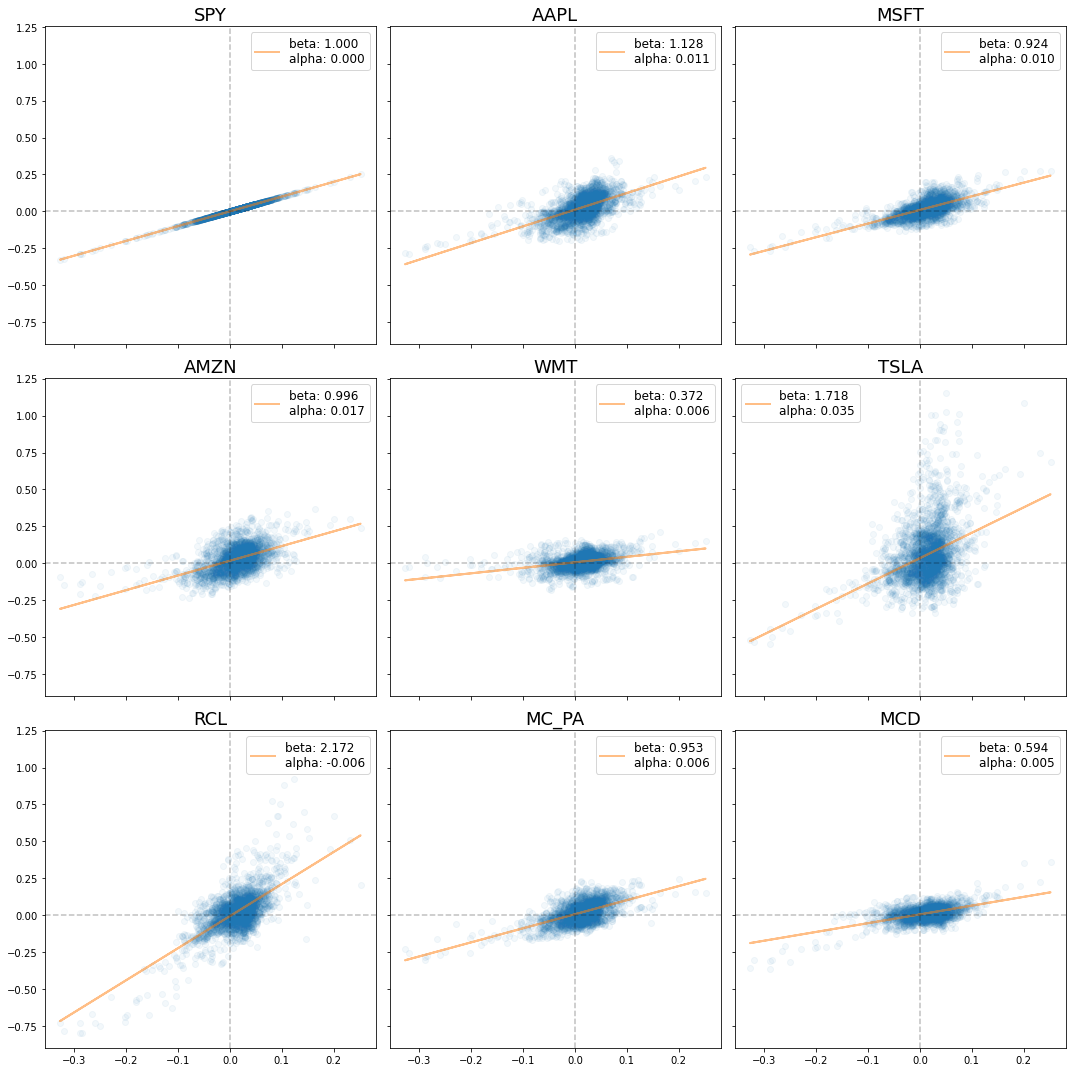

In [34]:


fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)

# plot data
k = 0
for i in range(3):
    
    for j in range(3):

        
        ticker = tickers[k]
        k+=1
        ax = axes[i][j]

        # plot data
        ax.scatter(returns['SPY'], returns[ticker], alpha=0.05)

        # regression estimators
        beta = covs[ticker]['SPY'] / covs['SPY']['SPY']
        alpha = means[ticker] - beta * means['SPY']

        label = f'beta: {beta:.3f} \nalpha: {alpha:.3f}'
        # plot regression
        y_hat = beta * returns['SPY'] + alpha
        ax.plot(returns['SPY'], y_hat, lw=2, alpha=.5, c=dcolors[1],
                 label=label)

        ax.set_title(f'{ticker}', fontsize=18)

        ax.axhline(ls='--', c='k', alpha=0.25)
        ax.axvline(ls='--', c='k', alpha=0.25)

        ax.legend(fontsize=12)
        
plt.tight_layout()
plt.show()

In [31]:
# some short hand
x = returns['SPY']
y = returns[ticker]
n = len(x)

Intercept    0.005077
SPY          0.593830
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MCD   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     1086.
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          3.69e-201
Time:                        21:32:43   Log-Likelihood:                 4982.5
No. Observations:                2760   AIC:                            -9961.
Df Residuals:                    2758   BIC:                            -9949.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0051      0.001      6.409      0.000       0.004       0.007
SPY            0.5938      0.018     32.960      0.000       0.559       0.629
==============================================================================
Omnibus:                       85.615   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.579
Skew:                          -0.008   Prob(JB):                     1.71e-49
Kurtosis:                       4.397   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

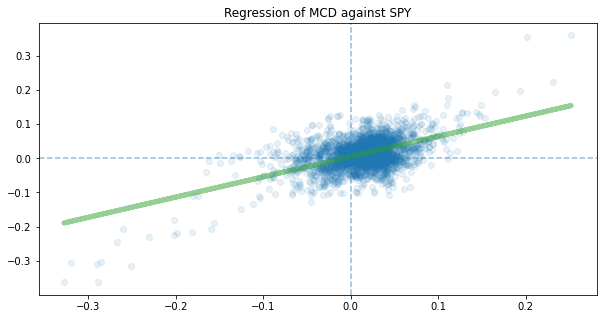

In [32]:
est = smf.ols(f'{ticker} ~ SPY', returns).fit()
summary = est.summary()
display(est.params)
display(summary)

# prediction
pred = est.predict()

fig = plt.figure(figsize=(10, 5))
# plot data
plt.scatter(returns['SPY'], returns[ticker], alpha=0.1)

# regression
plt.plot(returns['SPY'], pred, c=dcolors[2], lw=5, alpha=.5)

plt.title(f'Regression of {ticker} against SPY')

plt.axhline(ls='--', alpha=0.5)
plt.axvline(ls='--', alpha=0.5)

plt.show()

### Regression Analysis
https://365datascience.com/tutorials/statistics-tutorials/sum-squares/

In [19]:
# regression analysis

# sum of square errors
errors = y - y_hat
sse = errors@errors

# sum of squares of regression
dm = y_hat - y.mean()
ssr = dm@dm

# sum of squares total (var * n)
disper = y - y.mean()
sst = disper@disper

print(f'SSE: {sse:.6f} \nSSR: {ssr:.6f} \nSST: {sst:.6f} = SSE + SSR')

r_sq = ssr/sst

print(f'R-squared: {r_sq: .6f} = SSR/SST')

SSE: 4.369224 
SSR: 1.720969 
SST: 6.090193 = SSE + SSR
R-squared:  0.282580 = SSR/SST


In [20]:
# another way to calculate r-squared

# num: E(x*y) - E(x)*E(y)
num = ((x*y).mean() - x.mean() * y.mean())

# denominator: sqrt([E(x^2) - E(x)^2]*[E(y^2) - E(y)^2])
denom = np.sqrt(((x**2).mean()-x.mean()**2) * ((y**2).mean()-y.mean()**2))

r = num / denom

print(f'r-squared: {r**2:.6f}')

r-squared: 0.282580


### Standard Error:

https://en.wikipedia.org/wiki/Simple_linear_regression#Model-based_properties


In [21]:
# dispersion of x
disper_x = x-x.mean()

# standard error
se_beta = np.sqrt(sse/(n-2)) / np.sqrt(disper_x@disper_x)
se_alpha = se_beta * np.sqrt(sum(x**2)/n)

# t-statistic
t_stat_beta = beta / se_beta
t_stat_alpha = alpha / se_alpha

# p-value from t-distribution cdf (cumulative distribution function)
p_val_beta = 1-stats.t.cdf(t_stat_beta, df=n-1)
p_val_alpha = 1-stats.t.cdf(t_stat_alpha, df=n-1)

print('\t coeff \t\t se \t\t t-stat \t p-val')
print(f'alpha: \t {alpha:.6f} \t {se_alpha:.6f} \t {t_stat_alpha:.6f} \t {p_val_alpha:.6f}')
print(f'beta: \t {beta:.6f} \t {se_beta:.6f} \t {t_stat_beta:.6f} \t {p_val_beta:.6f}')

	 coeff 		 se 		 t-stat 	 p-val
alpha: 	 0.005077 	 0.000792 	 6.408735 	 0.000000
beta: 	 0.593830 	 0.018017 	 32.959569 	 0.000000


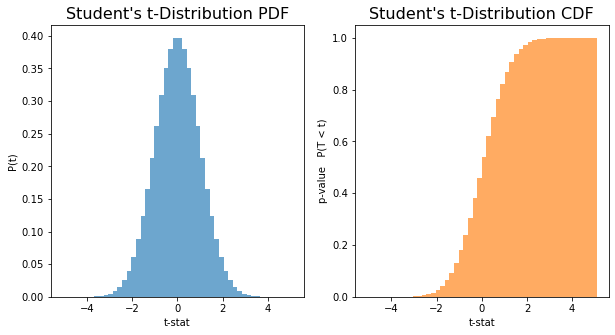

In [22]:
# illustration of student's t-distribution

t_space = np.linspace(-5, 5)
d_free = n-2

pdf_space = stats.t.pdf(t_space, df=d_free)
cdf_space = stats.t.cdf(t_space, df=d_free)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))


incr = t_space[1]-t_space[0]
fmt = dict(width=incr, alpha=0.65)

axes[0].bar(t_space, pdf_space, color=dcolors[0], **fmt)

axes[0].set_title('Student\'s t-Distribution PDF', fontsize=16)
axes[0].set_xlabel('t-stat')
axes[0].set_ylabel('P(t)')

axes[1].bar(t_space, cdf_space, color=dcolors[1], **fmt)

axes[1].set_title('Student\'s t-Distribution CDF', fontsize=16)
axes[1].set_xlabel('t-stat')
axes[1].set_ylabel('p-value   P(T < t)')

plt.show()

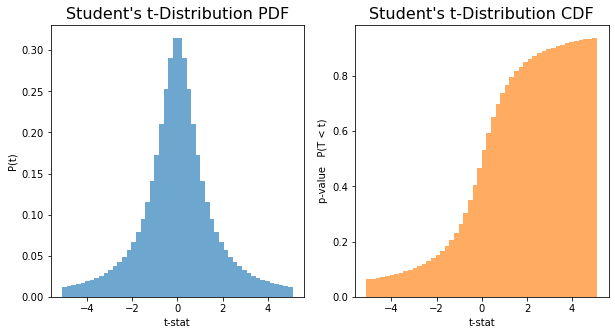

In [23]:
# illustration of student's t-distribution

t_space = np.linspace(-5, 5)
d_free = 1 # degrees of freedom = 1

pdf_space = stats.t.pdf(t_space, df=d_free)
cdf_space = stats.t.cdf(t_space, df=d_free)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))


incr = t_space[1]-t_space[0]
fmt = dict(width=incr, alpha=0.65)

axes[0].bar(t_space, pdf_space, color=dcolors[0], **fmt)

axes[0].set_title('Student\'s t-Distribution PDF', fontsize=16)
axes[0].set_xlabel('t-stat')
axes[0].set_ylabel('P(t)')

axes[1].bar(t_space, cdf_space, color=dcolors[1], **fmt)

axes[1].set_title('Student\'s t-Distribution CDF', fontsize=16)
axes[1].set_xlabel('t-stat')
axes[1].set_ylabel('p-value   P(T < t)')

plt.show()